# Análisis Exploratorio de Datos

##### El objetivo de este bloque es analizar y entender los datos obtenidos de la base de datos de Kaggle mediante los cuales queremos realizar un recomendador. El análisis se hará de 2 archivos diferentes, por un lado tendremos los datos de los libros y por otro lado, analizaremos los ratings de cada uno de los libros. 

##### La unión entre ambas tablas se hará de la siguiente forma: 
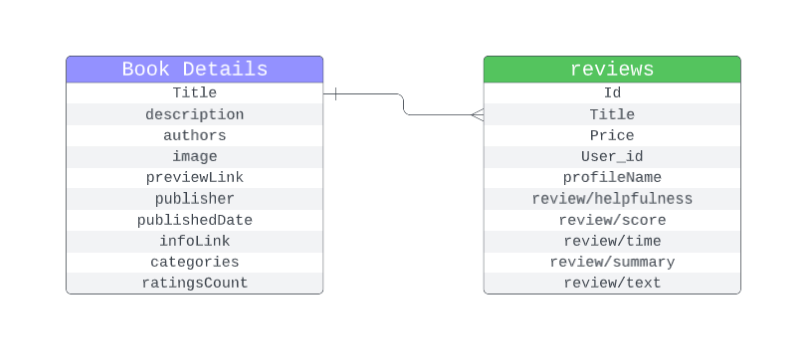

##### La tabla de reviews contiene lo siguiente: 

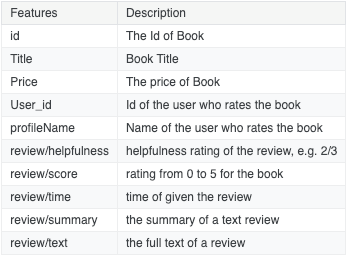

##### La tabla de Detalle de los libros contiene lo siguiente: 

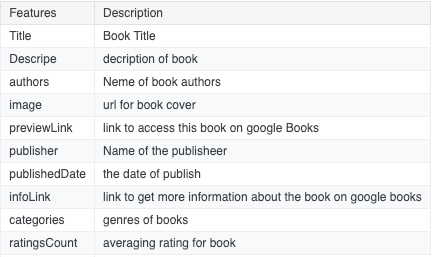

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '1'
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import re
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [3]:
df_books = pd.read_csv("books_data.csv")  #Creamos el DF con los datos de los libros

In [4]:
df_books

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


In [5]:
df_reviews = pd.read_csv("Books_rating.csv")  #Creamos el DF con los datos de las reviews de los libros

In [6]:
df_reviews

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,14/19,4.0,937612800,Difficult,"This is an extremely difficult book to digest,..."
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",1/11,5.0,1163030400,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


In [7]:
df_books.shape   #vemos las dimensiones del DF de libros

(212404, 10)

In [8]:
df_reviews.shape   #vemos las dimensiones del DF de reviews

(3000000, 10)

In [9]:
df_books.info()   #extraemos la información del DF_books y cada una de las varibales del mismo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [10]:
df_reviews.info()   #extraemos la información del DF_reviews y cada una de las varibales del mismo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [11]:
df_reviews.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [12]:
df_books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [13]:
colors = ["green", "yellow", "orange", "red", "purple"]
labels = df_reviews['review/score'].value_counts().keys().map(str)
values = df_reviews['review/score'].value_counts()/df_reviews['review/score'].value_counts().shape[0]


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

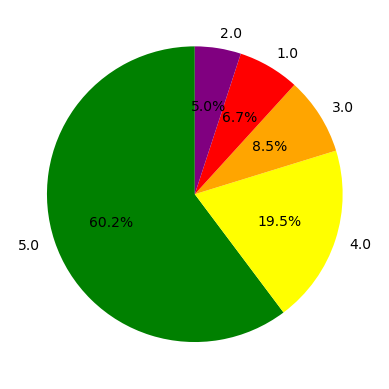

In [14]:
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.plot

In [15]:
# Extraer la columna 'Categoria' y obtener el conteo de cada valor único
categories = df_books['categories'].value_counts()
categories

categories
['Fiction']                               23419
['Religion']                               9459
['History']                                9330
['Juvenile Fiction']                       6643
['Biography & Autobiography']              6324
                                          ...  
['Authors, Japanese']                         1
['Birth certificates']                        1
['Restaurant management']                     1
['Oxford (England)']                          1
['Flame in the wind (Motion picture)']        1
Name: count, Length: 10883, dtype: int64

In [16]:
user_per_book=df_reviews.groupby('Title')['User_id'].count()
user_per_book=user_per_book.sort_values(ascending = False)
fig = px.bar(user_per_book.head(50))
fig.show()

# Tratamiento de Datos

##### El objetivo de este bloque es realizar el tratamiento de los datos pertinente para poder manipularlos y trabajar con ellos de la forma más óptima posible. 

In [17]:
# Check de valores nulos en el DF

df_reviews.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

#### Trabajo con los valores nulos del Dataset

##### Como los valores titulo e id son clave para la identificación de los usuarios y los libros, si ambas variables vienen vacías eliminaremos la fila. 



In [18]:
# Eliminamos las filas sin Título de libro y User Id

df_reviews_limpio = df_reviews.dropna(subset=['Title', 'User_id'])

In [19]:
# Eliminamos la columna de Precio y nombre de perfil ya que no nos aportan valor

df_reviews_limpio = df_reviews_limpio.drop(columns=['Price', 'profileName'])

In [20]:
# Añadimos valores vacíos a la columna de review para que no salga como NaN
df_reviews_limpio['review/summary'] = df_reviews_limpio['review/summary'].fillna('')
df_reviews_limpio['review/text'] = df_reviews_limpio['review/text'].fillna('')

In [21]:
df_reviews_limpio.isnull().sum()

Id                    0
Title                 0
User_id               0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [22]:
# Check de valores nulos en el DF de libros

df_books.isnull().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [23]:
# Drop rows with missing 'Title'
df_books = df_books.dropna(subset=['Title'])

# Impute missing values in 'ratingsCount' with the median
df_books['ratingsCount'] = df_books['ratingsCount'].fillna(df_books['ratingsCount'].median())

# Fill missing values in textual columns with empty strings
textual_columns = ['description', 'authors', 'publisher', 'publishedDate', 'categories']
df_books[textual_columns] = df_books[textual_columns].fillna('')

# Dropping columns we are not going to use
columns_to_drop = ['image', 'previewLink', 'infoLink']
df_books = df_books.drop(columns=columns_to_drop)

/var/folders/ld/mytckhbs5dncp330_1vwth840000gn/T/ipykernel_12491/1435306874.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ld/mytckhbs5dncp330_1vwth840000gn/T/ipykernel_12491/1435306874.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
df_books.isnull().sum()

Title            0
description      0
authors          0
publisher        0
publishedDate    0
categories       0
ratingsCount     0
dtype: int64

# Combinación de los 2 Dataframes

##### Una vez hemos hecho el análisis exploratorio de los datos y la limpieza de los mismos, procedemos a unificar ambos, de forma que podamos trabajar conjuntamente con toda la información unificada. 

In [ ]:
#Merge DataFrame or named Series objects with a database-style join.
#here i want to get all user id from left dataframe so, using left join
merged_df = pd.merge(df_reviews_limpio, df_books, on='Title', how='left')

In [26]:
#analyzing merged dataframe
merged_df_missing_values = merged_df.isnull().sum()
merged_df_missing_values

Id                    0
Title                 0
User_id               0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
description           0
authors               0
publisher             0
publishedDate         0
categories            0
ratingsCount          0
dtype: int64

In [27]:
merged_df.head(5)

,Id,Title,User_id,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,publisher,publishedDate,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,,['Julie Strain'],,1996,['Comics & Graphic Novels'],2.0
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0


# Collaborative filtering
##### Entramos en la parte de modelización de los datos. Buscamos encontrar grupos de usuarios con gustos similares para realizar las recomendaciones

In [28]:
# Create a mapping of user and item indices
user_ids = merged_df['User_id'].unique()
item_ids = merged_df['Title'].unique()
user_to_index = {user_id: idx for idx, user_id in enumerate(user_ids)}
item_to_index = {item_id: idx for idx, item_id in enumerate(item_ids)}
index_to_title = {idx: title for title, idx in item_to_index.items()}

# Convert user and item indices to tensors
user_indices = torch.tensor([user_to_index[user_id] for user_id in merged_df['User_id']], dtype=torch.long)
item_indices = torch.tensor([item_to_index[item_id] for item_id in merged_df['Title']], dtype=torch.long)
ratings = torch.tensor(merged_df['review/score'].values, dtype=torch.float32)

In [29]:
# Create a DataLoader
dataset = TensorDataset(user_indices, item_indices, ratings)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True) # i want to set batch size to lower number so that during training , model can adjust its parameters more as i will try to set total epochs lower
#A lower batch size can allow the model to update its parameters more frequently within each epoch.

### Comentarios sesión Antonio Pita

##### Crear 5 recomendadores: 
##### 1. Crear 2 no personalizados para aquellos usuarios que no hayan realizado compras ni reviews previas. La recomendación de los libros se hará o bien por volumen de reviews o por los mejor valorados.
##### 2. Crear 2 modelos personalizados (item - item) y (user - user).
##### 3. Si nos queremos complicar un poco, hacer un quinto que consista en vectorizar la descripción de los libros y realizar recomendaciones similares. 